# Scenario discovery - replication assignment - _Model answers_

In this exercise, you will replicate the results from three influential papers in the field of decision-making under uncertainty. By working through these cases, you will gain hands-on experience in applying the Patient Rule Induction Method (PRIM) to identify policy vulnerabilities, develop Shared Socio-economic Pathways (SSPs), and design adaptive decision-making strategies.

Replicate the results found in:

1. [Bryant et al (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), which introduces the "scenario discovery" approach.
2. [Rozenberg et al (2014)](https://doi.org/10.1007/s10584-013-0904-3), which proposes a "backwards" approach to SSP development.
3. [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004), which presents an iterative computational model-based approach for adaptive decision-making.

The data files are in the [data](data) folder and named in line with the papers. The full details for these papers can be found the course guide. Rozenberg et al and Hamarat et al are optional readings for these weeks. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://doi.org/10.1016/j.envsoft.2015.11.020), which gives a succinct summary of these three cases.

An additional useful, if dated, resource for Bryant et al is [Scenario discovery in Python](https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/) from the Water Programming blog.

mpld3 is no longer supported for python 3.6. Instead, use the `%matplotlib notebook` [magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) for interaction with the trade-off curves. You can revert back to inline with `%matplotlib inline`



## 1. Bryant & Lempert
> Bryant and Lempert's ["Thinking inside the box"](https://doi.org/10.1016/j.techfore.2009.08.002) introduces "scenario discovery," a computer-assisted method for identifying policy vulnerabilities using statistical or data-mining algorithms on simulation data. The approach is demonstrated on a U.S. renewable energy policy problem, addressing challenges faced in public debates.

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the `peel_alpha` in [PRIM](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/analysis/prim.html). This controls the leniency of the algorithm.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/casperve/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Read and view the data
data = pd.read_csv('./data/Bryant et al 2010.csv', index_col=None)
print(f"Shape of data: {data.shape[0]} rows, {data.shape[1]} columns.")
data.head(3)

Shape of data: 882 rows, 16 columns.


,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900002,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0


In [3]:
# Select the experiments
x = data.iloc[:, 2:11]
print(f"Columns in x: {x.columns.values}")

Columns in x: ['Cellulosic cost' 'Total biomass' 'Feedstock distribution'
 'Cellulosic yield' 'Oil elasticity' 'Demand elasticity'
 'Electricity coproduction' 'oil supply shift' 'Biomass backstop price']


In [4]:
# Select the outcome
y = data.iloc[:, 15].values

#### PRIM
We can now apply PRIM to the data. First, we create a PRIM object, then we execute one iteration of the PRIM algorithm. That is, find one box, starting from the current state of Prim.

Throughout the results below, compare them with those given in the original paper in [Section 3.2](https://www.sciencedirect.com/science/article/pii/S004016250900105X#section0050).

In [5]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

/home/casperve/anaconda3/lib/python3.8/site-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/home/casperve/anaconda3/lib/python3.8/site-packages/statsmodels/iolib/foreign.py:651: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.
  _type_converters = {253 : np.long, 252 : int}


AttributeError: module 'numpy' has no attribute 'long'

A first thing to look at is the trade-off between coverage and density.

_For a definition of coverage and density, see the [Glossary](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/glossary.html) of the EMAworkbench docs._

In [6]:
# Enable matplotlib interactive mode
# %matplotlib notebook

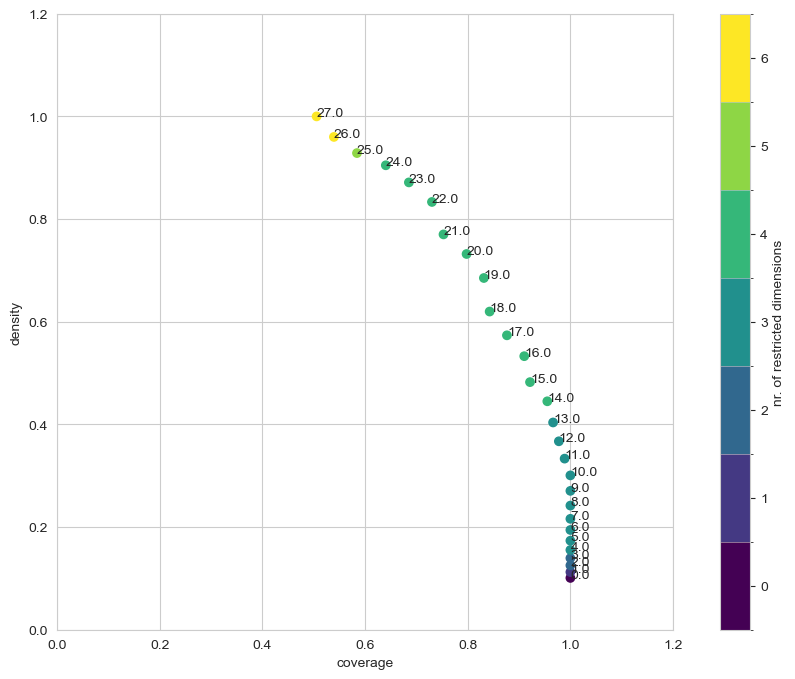

In [7]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff(annotated=True)
plt.show()

We can inspect any of the points on the trade-off curve using the inspect method. As shown, we can show the results either in a table format or in a visual format.

In [8]:
point = 19
box1.inspect(point)

coverage      0.831461
density       0.685185
id           19.000000
k            74.000000
mass          0.122449
mean          0.685185
n           108.000000
res_dim       4.000000
Name: 19, dtype: float64

                            box 19                                    
                               min         max      qp value  qp value
Total biomass           450.000000  755.799988           NaN  0.000001
Demand elasticity        -0.448500   -0.202000  5.620799e-17       NaN
Biomass backstop price  138.599998  199.600006  3.227320e-10       NaN
Cellulosic cost          72.650002  133.699997  9.570717e-02       NaN



[None]

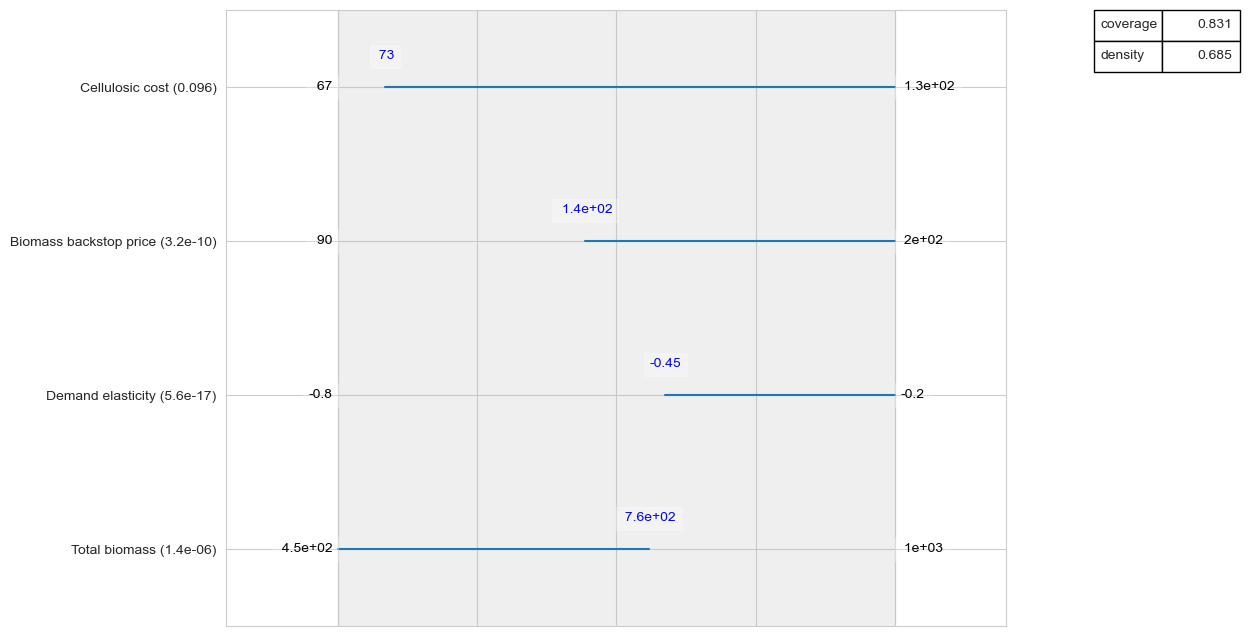

In [9]:
box1.inspect(point, style='graph')
plt.show()

This table shows the box limits. The darker gray background is the full range. The blue lines indicate the limits identified by PRIM for the box being inspected. The blue number indicate the limit. The number between brackets behind each parameter on the left hand side is the quasi p-value. The coverage and density are shown in the top right hand corner. We can see that the limit on cellulosic cost is not significant and should thus be ignored when making sense of the results.

#### Resampling

In [10]:
box1.resample(point)

[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9


,reproduce coverage,reproduce density
Total biomass,100.0,100.0
Demand elasticity,100.0,100.0
Biomass backstop price,100.0,100.0
Cellulosic cost,50.0,60.0
Cellulosic yield,30.0,40.0
Electricity coproduction,10.0,10.0
oil supply shift,10.0,10.0
Feedstock distribution,0.0,0.0
Oil elasticity,0.0,0.0


The resampling shows that for the top 3 parameters we can exactly reproduce coverage and density. This confirms the suggestion of the highly significant quasi p-values in the previous figure. The cellulosic cost is also a relatively reliable indicator with 70% reproduction of coverage and density. The other parameters can be safely ignored when interpreting the results.

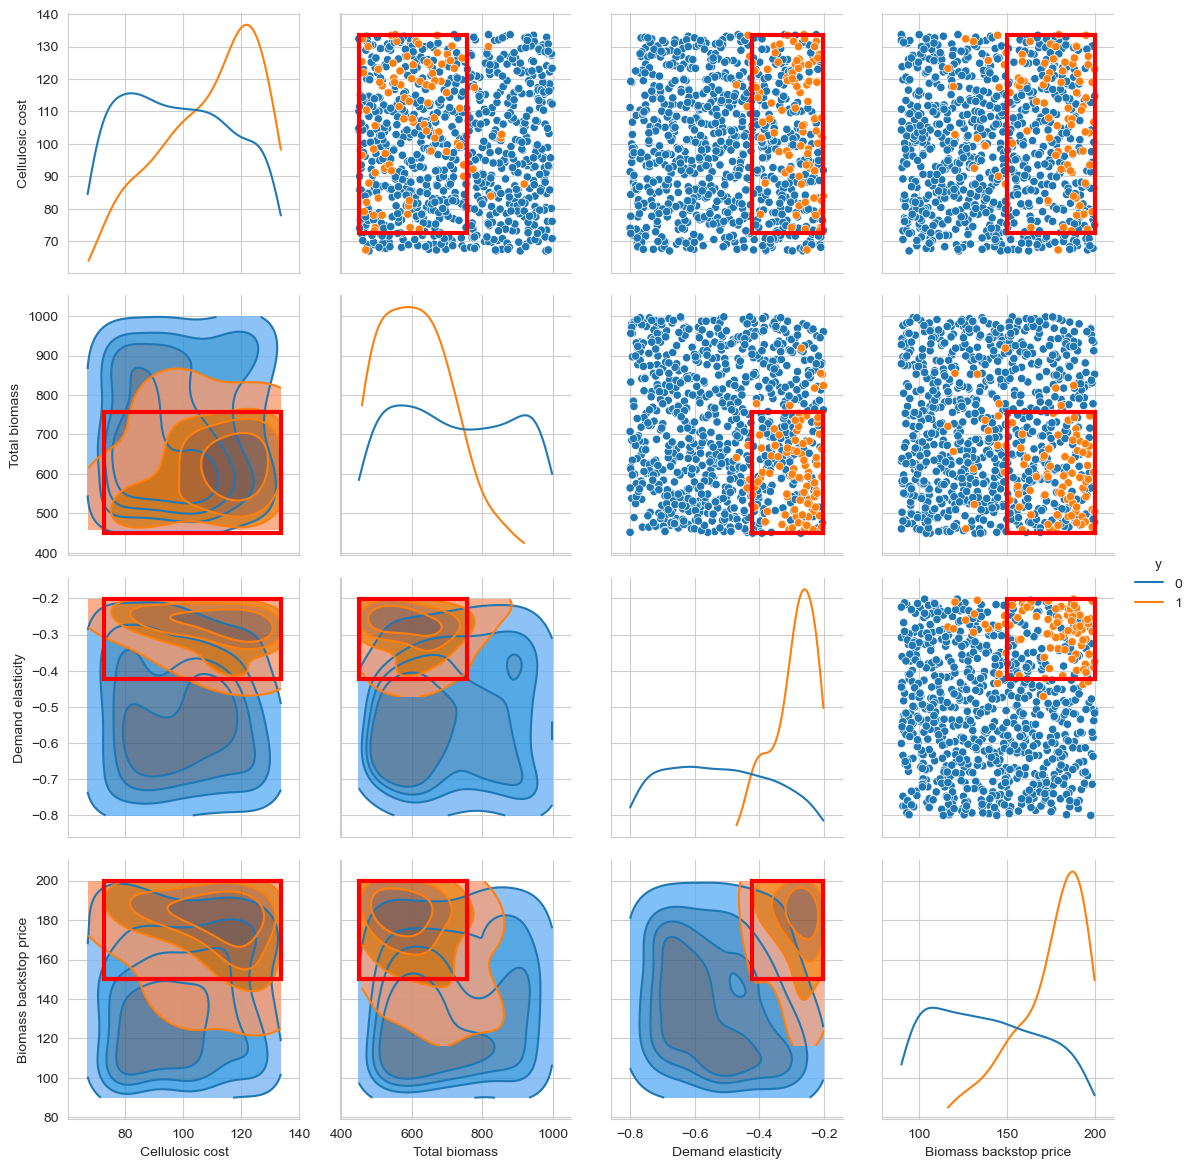

In [11]:
box1.select(21)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

The above pair-wise scatterplot shows in orange the cases of interest and in blue the cases not of interest. The diagonal shows the Guassian kernel density estimate for both. The red square indicates the identified box limits for each pair of parameters. This plot offers a useful diagnostic of the identified box limits.

Again, compare all the above results with those reported in Bryant & Lempert (2010) This example is a straightforward paradigmatic example of how to apply scenario discovery and the type of results that it can provide. Now lets continue to another paper that takes scenario discovery a step further.

## 2. Rozenberg et al
> In ["Building SSPs for climate policy analysis,"](https://doi.org/10.1007/s10584-013-0904-3) Rozenberg et al. propose a "backwards" approach to develop Shared Socio-economic Pathways (SSPs) using potential drivers of mitigation and adaptation challenges. The method aids in focusing storylines on the most relevant driving forces.

* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply PRIM separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM

The model answer below shows how to apply PRIM for one of the SSPs. The code for the other SSPs is identical. The only difference is that a different column from the CSV file is used.

In [12]:
# Read and select the data
data = pd.read_csv('./data/Rozenberg et al 2014.csv', index_col=None)
x = data.iloc[:, 0:7]
y = data.iloc[:, 7].values # change to higher index for different SSP's

In [13]:
# Peel alpha controls the leniency of the algorithm, the higher, the less lenient
# The meaning of peel_alpha is the percentile of the data that is to be removed
prim_obj = prim.Prim(x, y, mass_min=0.001, threshold=0.16, 
                     peel_alpha=0.01)
box2 = prim_obj.find_box()

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.027972027972027972, coverage: 0.18181818181818182, density: 1.0 restricted_dimensions: 4


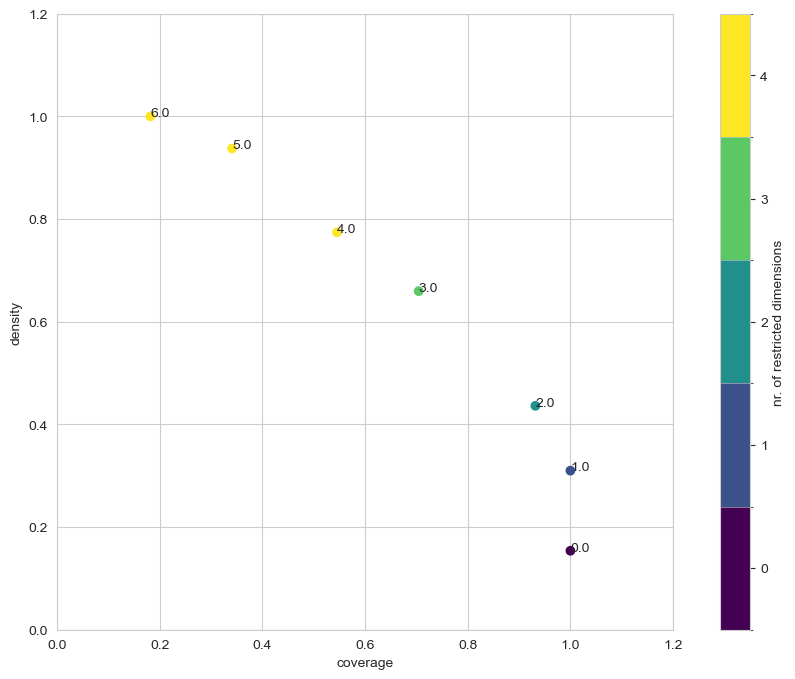

In [14]:
# Plot the trade-off curve
box2.show_tradeoff(annotated=True)
plt.show()

In [15]:
# Inspect a specific point on the trade-off curve
box2.inspect(3)
plt.show()

coverage     0.704545
density      0.659574
id           3.000000
k           31.000000
mass         0.164336
mean         0.659574
n           47.000000
res_dim      3.000000
Name: 3, dtype: float64

             box 3                         
               min  max  qp value  qp value
population     0.0  1.0       NaN  0.009555
behaviors      1.0  1.0  0.000003       NaN
inequalities   1.0  1.0  0.001675       NaN



Rozeberg er al took scenario discovery but rather than apply it to a binary classification (of interest or not of interest) they first apply a manual clustering to the model results. Next, for each cluster they apply scenario discovery in the exact same way as Bryant & Lempert (2010). This idea is now commonly used. For example, Steinmann et al (2020) use time series clustering in combination with scenario discovery. This paper is based on [Patrick's MSc thesis](https://repository.tudelft.nl/islandora/object/uuid%3Acb4fee52-e23f-41d3-9c63-7ca7ec948304).

## 3. Hamarat et al
> Hamarat, Kwakkel, and Pruyt's ["Adaptive Robust Design under deep uncertainty"](https://doi.org/10.1016/j.techfore.2012.10.004) presents an iterative computational model-based approach for adaptive decision-making under uncertainty. The approach combines adaptive policy-making, simulation models, data mining, and robust optimization, with potential applications in long-term structural transformations.

This is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

As can be seen by the results, PRIM fails to find a good explanation for why negative outcomes occur.

In [16]:
from ema_workbench import load_results

results = load_results('./data/Hamarat et al 2013.gz')

[MainProcess/INFO] results loaded successfully from /Users/jhkwakkel/Documents/GitHub/epa141A/Week 3-4 - vulnerability analysis/data/Hamarat et al 2013.gz


In [17]:
x, outcomes = results
ooi = outcomes['fraction renewables']
y = ooi[:, -1] < ooi[:, 0]


In [18]:
prim_obj = prim.Prim(x, y, mass_min=0.05, threshold=0.1, peel_alpha=0.05)
box3 = prim_obj.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] column policy dropped from analysis because it has only one category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.732824427480916, mass: 0.0524, coverage: 0.22043628013777267, density: 0.732824427480916 restricted_dimensions: 12


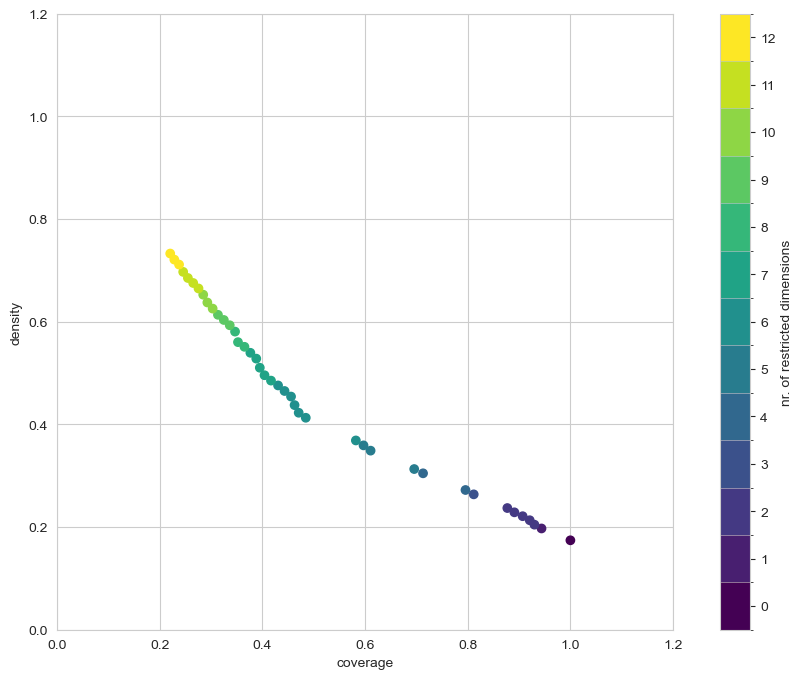

In [19]:
box3.show_tradeoff(annotated=False)
plt.show()

* PRIM struggles with finding a good explanation for this case, why?

The model is highly non-linear and the cases of interest are not nicely located in an orthoganal box. This can also be seen by creating a pairwise scatter plot of the results for any of the boxes on the peeling trajectory.



In [20]:
box3.inspect_tradeoff()

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/c

alt.VConcatChart(...)

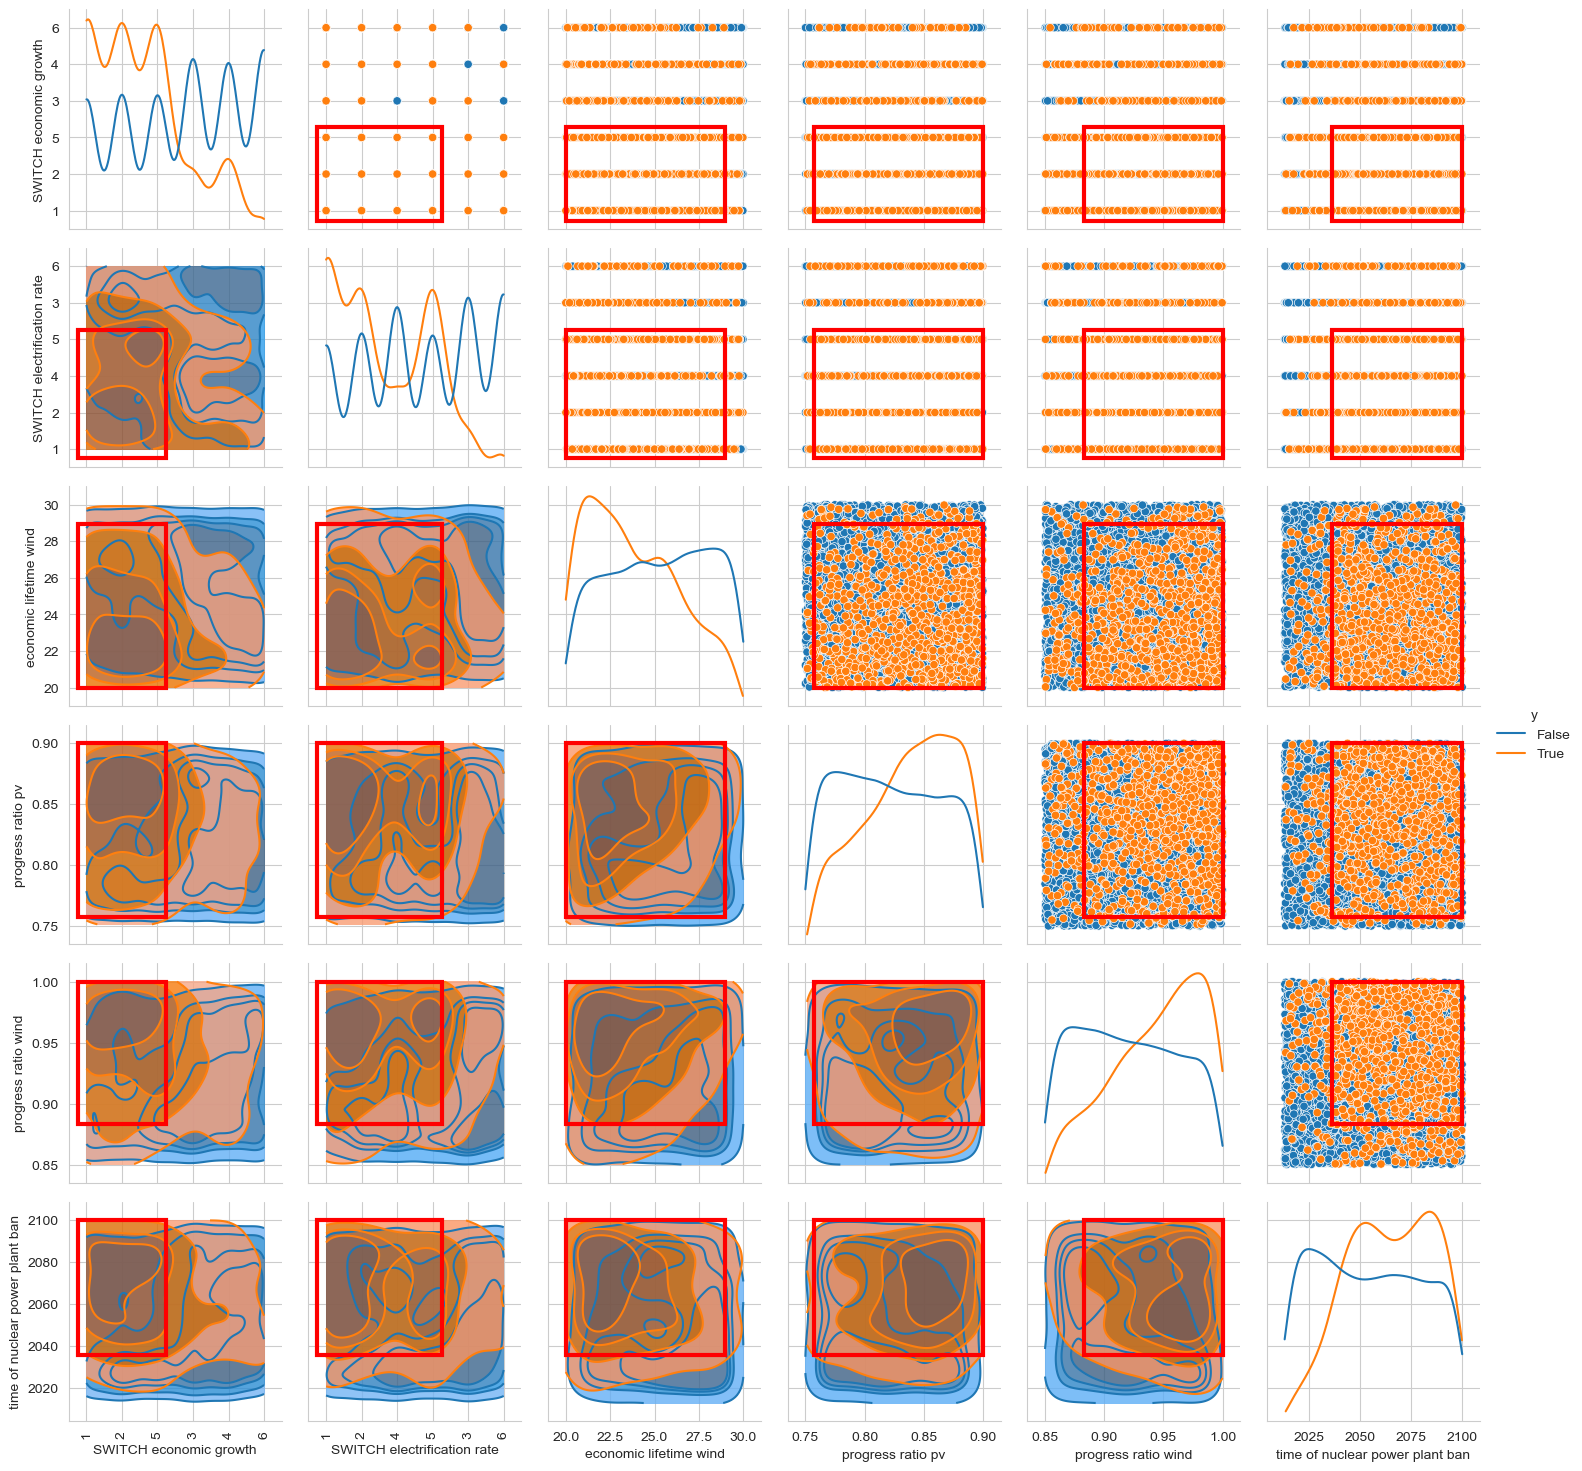

In [21]:
box3.show_pairs_scatter(19)
plt.show()

* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?

implementing this is a bit tricky. Principal components analysis is defined only for non-categorical datatypes. Or, to be even more nitpicky, only for real valued parameters. We thus need to select those columns that are non-categorical, apply PCA to this, and than add back in the categorical columns.

In [22]:
x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
x_categorical = x.select_dtypes(include=pd.CategoricalDtype)

rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, y)

/var/folders/_t/l6cr0r0d1m108xdrmrtz7stsb_csl0/T/ipykernel_70228/3011427037.py:1: UserWarning: Instantiating CategoricalDtype without any arguments.Pass a CategoricalDtype instance to silence this warning.
  x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
/var/folders/_t/l6cr0r0d1m108xdrmrtz7stsb_csl0/T/ipykernel_70228/3011427037.py:2: UserWarning: Instantiating CategoricalDtype without any arguments.Pass a CategoricalDtype instance to silence this warning.
  x_categorical = x.select_dtypes(include=pd.CategoricalDtype)


In [23]:
rotated_x = pd.concat([rotated_experiments, x_categorical], axis=1)

In [24]:
prim_obj = prim.Prim(rotated_x, y, mass_min=0.05, threshold=0.1, peel_alpha=0.05)
box4 = prim_obj.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] column policy dropped from analysis because it has only one category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.84375, mass: 0.0576, coverage: 0.27898966704936856, density: 0.84375 restricted_dimensions: 13


In [25]:
box4.inspect_tradeoff()

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/c

alt.VConcatChart(...)

So, PCA preprocessing makes a rather big difference: we can find much higher coverage and density. Why? PCA preprocessing works if there are interaction effects amongst multiple uncertainties which joinly explain the experiments of interest. Intuitively: the cases of interest are located not in a nice box in one of the corners but are located on a diagonal. PCA helps finding a way of rotating the data such that after rotating, we can nicely put the cases of interest into an orthogonal box. The downside is that we have our box definition in the rotated space (denoted by the r_{number}).See the Dalal paper for more detail. 

just to give you a sense, below I show again the pairwise scatter, note how for the numerical uncertainties the data is clearly rotated compared to the previous pair wise plot.

In [ ]:
box4.show_pairs_scatter()
plt.show()

For a detailed interpretation of the results, please refer to the discussion in the journal paper.

This last example illustrates that for highly non-linear models with many uncertain parameters, PRIM will struggle to produce good results. This is largely due to PRIM trying to find orthogonal subspaces in the model input space. In case of non-linear interactions, the cases of interest are unlikely to be nicely orthogonal. Various recent journal papers have been experimenting with other rule induction algorithms that make less restrictive assumptions. However, this often comes at the expense of interpretatiblity. The example folder of the workbench contains a few of these such as boosted trees and logistic regression.

#### Concluding remarks
This assignment has introduced scenario discovery, the use of scenario discovery with multiple clusters of interest, and an example of where PRIM will start to struggle. It also has shown how three journal papers can be reproduced with the workbench.